<a href="https://colab.research.google.com/github/Harmokay/my-python-learning-journey/blob/main/Workshop_7%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

## P 7.1: Download the adult_T7 dataset from Canvas. Use four classifiers to predict the 'income' column. Calculate all evaluation metrics using a five-fold cross-validation. Print the feature importance values from the random forest classifier. You should improve your models as best as you can (10%).

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)  ####################
#import your dataset
from google.colab import files
uploaded = files.upload()


Saving adult_T7.csv to adult_T7.csv


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd. read_csv('adult_T7.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
5,37,Private,186808,HS-grad,9,Never-married,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K
6,34,Private,339142,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Female,0,0,40,United-States,<=50K
7,38,Private,101387,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,43,United-States,<=50K
8,62,Private,166691,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
9,50,Local-gov,50178,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,4064,0,55,United-States,<=50K


In [8]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K
9999,21,Private,252253,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [5]:
data.shape

(10000, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [7]:
data = data.dropna()

In [8]:
data.shape

(9765, 15)

In [9]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
data.replace('?', np.nan, inplace=True)

In [11]:
print(data.isnull().sum())

age                 0
workclass         407
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        408
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    136
income              0
dtype: int64


In [12]:
data.dropna(inplace=True)

In [13]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
5,37,Private,186808,HS-grad,9,Never-married,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K


In [14]:
#reindexing the datasets
data.reset_index(drop=True, inplace=True)

In [15]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
3,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
4,37,Private,186808,HS-grad,9,Never-married,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9226 non-null   int64 
 1   workclass       9226 non-null   object
 2   fnlwgt          9226 non-null   int64 
 3   education       9226 non-null   object
 4   education-num   9226 non-null   int64 
 5   marital-status  9226 non-null   object
 6   occupation      9226 non-null   object
 7   relationship    9226 non-null   object
 8   race            9226 non-null   object
 9   sex             9226 non-null   object
 10  capital-gain    9226 non-null   int64 
 11  capital-loss    9226 non-null   int64 
 12  hours-per-week  9226 non-null   int64 
 13  native-country  9226 non-null   object
 14  income          9226 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [17]:
data.income.value_counts()

,count
income,
<=50K,6909
>50K,2317


In [18]:
#extracting input and output data
X=data.drop('income', axis =1)
y=data.iloc[:,14]

In [19]:
y.head()

,income
0,>50K
1,<=50K
2,>50K
3,<=50K
4,<=50K


In [20]:
#numerical columns
num_cols = data.select_dtypes(include=['number'])
print(num_cols.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   29  216481             14             0             0              40
1   36  280570             10             0             0              45
2   47  145636             11             0             0              48
3   33  119422              9             0             0              40
4   37  186808              9             0             0              40


In [21]:
#categorical columns
cat_cols = data.select_dtypes(include=['object'])
print(cat_cols.head())

  workclass     education      marital-status         occupation relationship  \
0   Private       Masters  Married-civ-spouse    Exec-managerial         Wife   
1   Private  Some-college  Married-civ-spouse       Craft-repair      Husband   
2   Private     Assoc-voc  Married-civ-spouse  Handlers-cleaners      Husband   
3   Private       HS-grad  Married-civ-spouse    Exec-managerial      Husband   
4   Private       HS-grad       Never-married              Sales    Unmarried   

    race     sex native-country income  
0  White  Female  United-States   >50K  
1  White    Male  United-States  <=50K  
2  White    Male  United-States   >50K  
3  White    Male  United-States  <=50K  
4  White    Male  United-States  <=50K  


In [22]:
#encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in list(cat_cols):
    cat_cols[col] = le.fit_transform(cat_cols[col])

In [23]:
cat_cols.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,2,12,2,3,5,4,0,37,1
1,2,15,2,2,0,4,1,37,0
2,2,8,2,5,0,4,1,37,1
3,2,11,2,3,0,4,1,37,0
4,2,11,4,11,4,4,1,37,0


In [24]:
cat_cols.drop(columns='native-country', inplace=True)

In [25]:
cat_cols.head()

,workclass,education,marital-status,occupation,relationship,race,sex,income
0,2,12,2,3,5,4,0,1
1,2,15,2,2,0,4,1,0
2,2,8,2,5,0,4,1,1
3,2,11,2,3,0,4,1,0
4,2,11,4,11,4,4,1,0


In [26]:
type(num_cols)

pandas.core.frame.DataFrame

In [27]:
num_cols = data.select_dtypes(include=['number'])

In [28]:
#save the column names
num_cols_names = num_cols.columns

In [29]:
#normalizing the numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols_scaled = scaler.fit_transform(num_cols)

In [30]:
#convert back to dataframe
num_cols = pd.DataFrame(num_cols_scaled, columns=num_cols_names)

In [31]:
num_cols.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.164384,0.146459,0.866667,0.0,0.0,0.391753
1,0.260274,0.194042,0.600000,0.0,0.0,0.443299
2,0.410959,0.093861,0.666667,0.0,0.0,0.474227
3,0.219178,0.074399,0.533333,0.0,0.0,0.391753
4,0.273973,0.124429,0.533333,0.0,0.0,0.391753


In [32]:
X = data.drop('income', axis=1)
y = data['income']

In [33]:
X = pd.get_dummies(X, drop_first=True)

In [34]:
#splitting the datasets into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6458, 95)
(2768, 95)
(6458,)
(2768,)


In [36]:
X_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [37]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

SVM = svm.SVC()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [38]:
#TRAINING THE DATASET
SVM.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
#PREDICTION
y_pred1 = SVM.predict(X_test)
y_pred2 = KNN.predict(X_test)
y_pred3 = DT.predict(X_test)
y_pred4 = RF.predict(X_test)

Text(0.5, 1.0, 'RF')

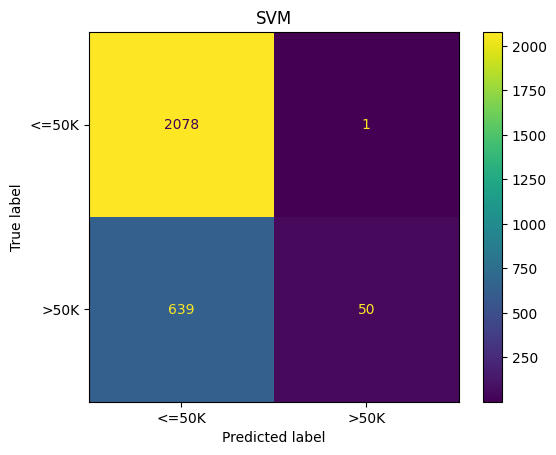

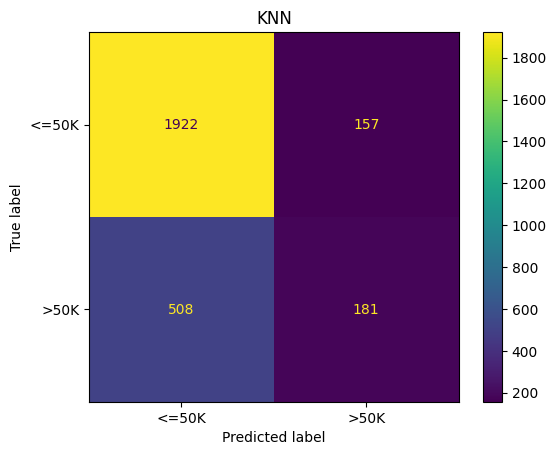

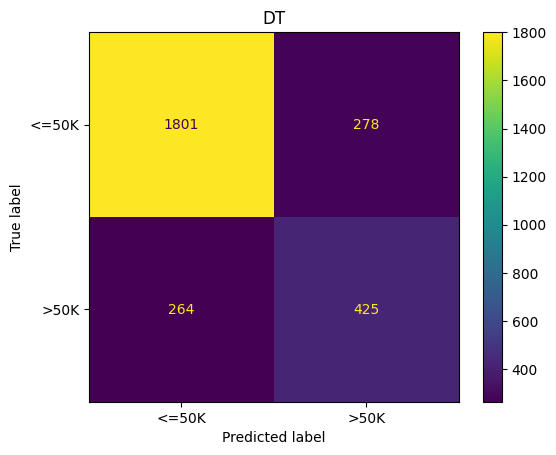

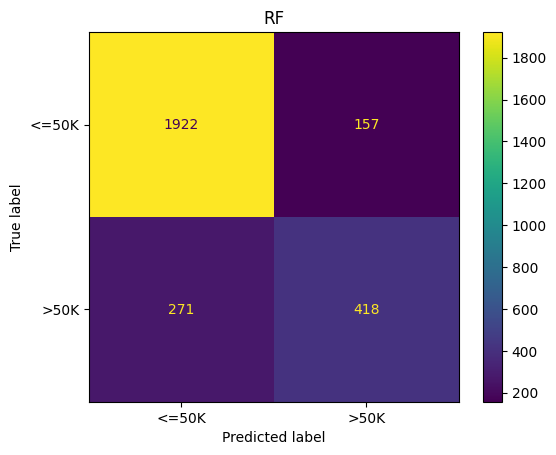

In [40]:
#CREATING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=SVM.classes_)
disp.plot()
plt.title('SVM')

cm2 = confusion_matrix(y_test, y_pred2, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=KNN.classes_)
disp.plot()
plt.title('KNN')

cm3 = confusion_matrix(y_test, y_pred3, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=DT.classes_)
disp.plot()
plt.title('DT')

cm4 = confusion_matrix(y_test, y_pred4, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=RF.classes_)
disp.plot()
plt.title('RF')


In [41]:
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [42]:
#PRINTING THE EVALUATION METRICS
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm4)
print('\n\n')

SVM metrics

True Positives: 50
True Negatives: 2078
False Positives: 1
False Negatives: 639
--------------------------------------------------
Accuracy: 0.77
Mis-Classification: 0.23
Sensitivity: 0.07
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.14



KNN metrics

True Positives: 181
True Negatives: 1922
False Positives: 157
False Negatives: 508
--------------------------------------------------
Accuracy: 0.76
Mis-Classification: 0.24
Sensitivity: 0.26
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.41



DT metrics

True Positives: 425
True Negatives: 1801
False Positives: 278
False Negatives: 264
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.62
Specificity: 0.87
Precision: 0.87
f_1 Score: 0.72



RF metrics

True Positives: 418
True Negatives: 1922
False Positives: 157
False Negatives: 271
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.61
Specificity: 0.92
Precision: 0

## P 7.2: Use two clustering methods to cluster a numerical column in the dataset. Find the optimum number of clusters using the elbow method (5%).  

## NOTE: Please complete this task in the next week's workshop
## NOTE: You can use any aptional numerical column for this task.